In [1]:
%matplotlib inline
!mkdir -p data/plots
import jsonlines
import sentencepiece as spm

import pandas as pd
import numpy as np

import plotnine as p9

sp = spm.SentencePieceProcessor()
sp.Load('../data/codesearchnet_javascript/csnjs_8k_9995p_unigram_url.model')

True

In [2]:
%%time
data = []
with jsonlines.open('../data/codesearchnet_javascript/javascript_train_supervised.jsonl') as f:
    for obj in f:
        data.append(obj)

df = pd.DataFrame(data)
df['func_name_len'] = df['func_name'].str.len()
df['code_len'] = df['code'].str.len()
df['func_name_subword_len'] = df['func_name'].apply(lambda x: len(sp.EncodeAsIds(x)))

CPU times: user 4.52 s, sys: 554 ms, total: 5.07 s
Wall time: 5.09 s


In [8]:
func_name_ids = {k: idx for idx, k in enumerate(set(df['func_name']))}
df['func_name_idx'] = df['func_name'].apply(lambda x: func_name_ids[x])
print(len(func_name_ids))

58335


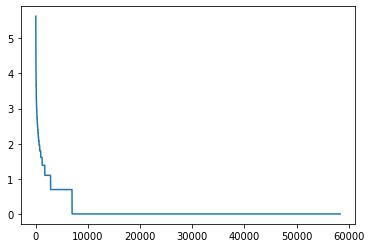

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
x = Counter(df['func_name'])

In [20]:
print(x)

Counter({'init': 278, 'parse': 239, 'get': 182, 'create': 180, 'validate': 144, 'run': 143, 'update': 127, 'extend': 126, 'merge': 111, 'render': 104, 'set': 102, 'transform': 101, 'main': 98, 'resolve': 98, 'add': 95, 'load': 92, 'format': 89, 'log': 88, 'start': 86, 'compile': 85, 'Client': 84, 'find': 84, 'normalize': 83, 'clone': 81, 'remove': 78, 'wrap': 76, 'Strategy': 75, 'build': 73, 'request': 68, 'map': 67, 'execute': 67, 'write': 65, 'stringify': 63, 'copy': 63, 'read': 62, 'filter': 61, 'destroy': 60, 'flatten': 58, 'encode': 57, 'error': 55, 'check': 54, 'send': 54, 'setup': 52, 'connect': 52, 'exec': 51, 'each': 50, 'process': 49, 'initialize': 48, 'decode': 47, 'match': 46, 'toArray': 46, 'define': 46, 'list': 46, 'factory': 45, 'bind': 44, 'generate': 44, 'report': 44, 'on': 44, 'forEach': 43, 'compare': 43, 'isEmpty': 42, 'next': 41, 'replace': 41, 'insert': 41, 'Plugin': 40, 'done': 40, 'register': 40, 'sort': 39, 'serialize': 39, 'reduce': 39, 'clean': 39, 'install':

In [19]:
hot_tokens = list(idx for idx, value in x.items() if value > 1)
plt.plot(list(reversed(sorted(x.values()))))
len(hot_tokens)

6940

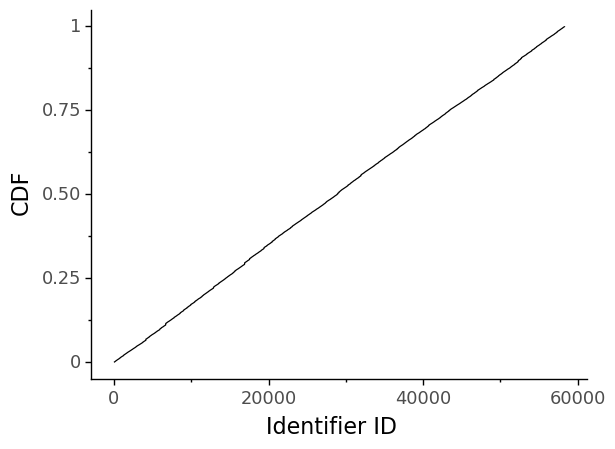

<ggplot: (8748355779601)>

In [7]:
p9.ggplot(
    data=df,
    mapping=p9.aes(x='func_name_idx')
) + p9.stat_ecdf() + p9.xlab('Identifier ID') + p9.ylab('CDF') + p9.theme_classic(16)

/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: data/plots/identifier_length.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_ecdf : Removed 458 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: data/plots/code_length.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:

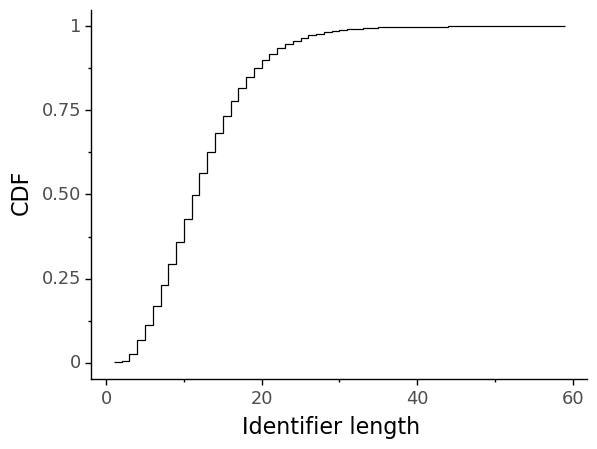

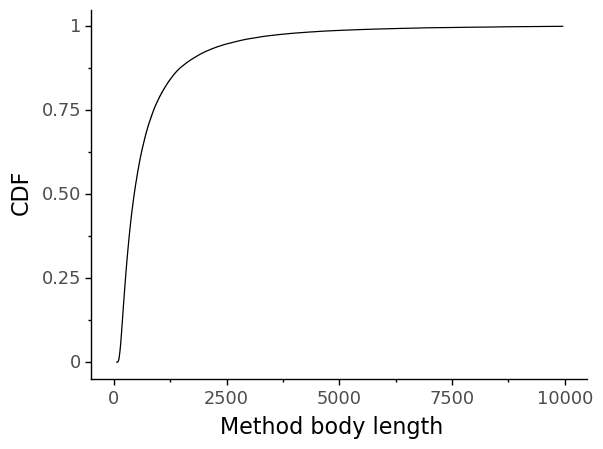

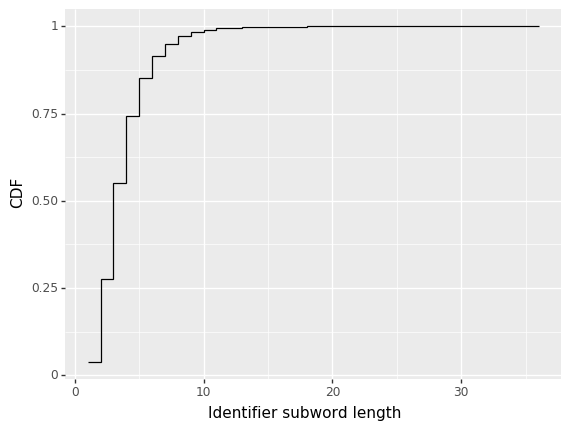

In [65]:
plt_identifier_len = p9.ggplot(
    data=df,
    mapping=p9.aes(x='func_name_len')
) + p9.stat_ecdf() + p9.xlab('Identifier length') + p9.ylab('CDF') + p9.theme_classic(16)
plt_identifier_len.draw()
plt_identifier_len.save('data/plots/identifier_length.pdf')

plt_code_len = p9.ggplot(
    data=df,
    mapping=p9.aes(x='code_len')
) + p9.stat_ecdf() + p9.xlab('Method body length') + p9.ylab('CDF') + p9.theme_classic(16) + p9.xlim(0, 10000)
plt_code_len.draw()
plt_code_len.save('data/plots/code_length.pdf')

n_subwords = p9.ggplot(
    data=df,
    mapping=p9.aes(x='func_name_subword_len')
) + p9.stat_ecdf() + p9.xlab('Identifier subword length') + p9.ylab('CDF')
n_subwords.draw()
n_subwords.save('data/plots/identifier_subword_length.pdf')